## 2D velocity learner

In [2]:
import numpy as np

def read_txt(txt_file):
    
    timestamps, positions, velocities = [], [], []
    
    with open(txt_file) as txt:
        i = 1
        for line in txt:
            line_info = line.split(',')
            timestamps.append(eval(line_info[0].split()[-1]))
#             print(i, eval(line_info[0].split()[-1]))
            i += 1
            if line_info[1].split(':')[1][1:].split()[0] == '[':
                x = eval(line_info[1].split(':')[1][1:].split()[1][1:])
                y = eval(line_info[1].split(':')[1][1:].split()[2])
                if line_info[1].split(':')[1][1:].split()[3].endswith(']'):
                    z = eval(line_info[1].split(':')[1][1:].split()[3][:-1])
                else:
                    z = eval(line_info[1].split(':')[1][1:].split()[3])
            else:
                x = eval(line_info[1].split(':')[1][1:].split()[0][1:])
                y = eval(line_info[1].split(':')[1][1:].split()[1])
                z = eval(line_info[1].split(':')[1][1:].split()[2])
            positions.append((x,y,z))
            vx = eval(line_info[2].split('Vector3(')[1][2:])
            vy = eval(line_info[3][3:])
            wz = eval(line_info[-1][3:-3])
            velocities.append((vx, vy, wz))
            

    return timestamps, positions, velocities
timestamps, positions, velocities = read_txt("../../ros2_dynamics_learner/experiments/dynamics_data_2d.txt")


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

cur_state_file = "../data/states/current_state.csv"
ref_state_file = "../data/states/reference_state.csv"

def read_csv(cur_state_file, ref_state_file):
    
    cur_states = pd.read_csv(cur_state_file)
    cur_states['timestamp'] = cur_states['time'].apply(lambda t: datetime.strptime(t[:-3], "%Y/%m/%d %H:%M:%S.%f"))
    cur_states['ref_state'] = np.nan
    cur_states = cur_states.sort_values(by='timestamp')
    cur_states.reset_index(drop=True, inplace=True)
    cur_states['state_vector'] = cur_states['state_vector'].apply(lambda s: eval(s)[3:5] + [eval(s)[8]])
    
    ref_states = pd.read_csv(ref_state_file)
    ref_states['timestamp'] = ref_states['time'].apply(lambda t: datetime.strptime(t[:-3], "%Y/%m/%d %H:%M:%S.%f"))
    
    return cur_states, ref_states

cur_states, ref_states = read_csv(cur_state_file, ref_state_file)

In [3]:
def match_cur_ref(cur_states, ref_states):

    ref_index = 0
    ref_timestamp = ref_states['timestamp'][0]
    refs = []
    ref_size = len(ref_states)

    for cur_index, row in cur_states.iterrows():
        if ref_index + 1>= ref_size:
            refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
        elif row['timestamp'] > ref_states['timestamp'][ref_index+1]:
            ref_index += 1
            refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
        elif row['timestamp'] > ref_states['timestamp'][ref_index]:
            refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
        else:
            # Error msg
            print(cur_index, row['timestamp'], ref_states['timestamp'][ref_index])
    cur_states['ref_state'] = refs
    return
match_cur_ref(cur_states, ref_states)

In [4]:
cur_states

,time,header,state_vector,state_valid,timestamp,ref_state
0,2022/03/09 14:08:47.855500787,"{'stamp': {'secs': 1646834927, 'nsecs': 849520...","[-2.2273217465895585, 3.79323960975553, -5.146...",0,2022-03-09 14:08:47.855500,"[-0.6418876122757036, 0.8553509527321579, 0.0]"
1,2022/03/09 14:08:47.855611999,"{'stamp': {'secs': 1646834927, 'nsecs': 855310...","[-2.03550126176798, 3.4576988469417635, -5.146...",0,2022-03-09 14:08:47.855611,"[-0.6418876122757036, 0.8553509527321579, 0.0]"
2,2022/03/09 14:08:47.868998529,"{'stamp': {'secs': 1646834927, 'nsecs': 868787...","[-1.4902219321906176, 2.5344741758476537, -5.1...",0,2022-03-09 14:08:47.868998,"[-0.6418876122757036, 0.8553509527321579, 0.0]"
3,2022/03/09 14:08:47.874180324,"{'stamp': {'secs': 1646834927, 'nsecs': 873983...","[-0.3141612119985471, 0.5563352407766069, -5.1...",0,2022-03-09 14:08:47.874180,"[-0.6418876122757036, 0.8553509527321579, 0.0]"
4,2022/03/09 14:08:47.875891551,"{'stamp': {'secs': 1646834927, 'nsecs': 875735...","[-0.22544476143618009, 0.45512360081701925, -5...",0,2022-03-09 14:08:47.875891,"[-0.6418876122757036, 0.8553509527321579, 0.0]"
...,...,...,...,...,...,...
8967,2022/03/09 14:09:54.76122618,"{'stamp': {'secs': 1646834994, 'nsecs': 758232...","[0.7734181161537879, -0.4180672518026348, -5.1...",0,2022-03-09 14:09:54.761220,"[0.9331920471790418, -0.5039394439081282, 0.0]"
8968,2022/03/09 14:09:54.84917630,"{'stamp': {'secs': 1646834994, 'nsecs': 845519...","[0.750740376632729, -0.40588814016367036, -5.1...",0,2022-03-09 14:09:54.849170,"[0.9331920471790418, -0.5039394439081282, 0.0]"
8969,2022/03/09 14:09:54.89031002,"{'stamp': {'secs': 1646834994, 'nsecs': 887903...","[0.757151497010798, -0.40942303362017995, -5.1...",0,2022-03-09 14:09:54.890310,"[0.9331920471790418, -0.5039394439081282, 0.0]"
8970,2022/03/09 14:09:54.92512753,"{'stamp': {'secs': 1646834994, 'nsecs': 922891...","[0.781140629885539, -0.422440239164675, -5.146...",0,2022-03-09 14:09:54.925120,"[0.9331920471790418, -0.5039394439081282, 0.0]"


In [5]:
ref_states[["timestamp", "vn", "ve", "yaw"]]

,timestamp,vn,ve,yaw
0,2022-03-09 14:08:45.730987,-0.971014,0.100214,0.0
1,2022-03-09 14:08:47.729780,-0.641888,0.855351,0.0
2,2022-03-09 14:08:49.728785,0.111561,0.127419,0.0
3,2022-03-09 14:08:51.730946,-0.912541,-0.844256,0.0
4,2022-03-09 14:08:53.732966,-0.403013,-0.290656,0.0
5,2022-03-09 14:08:55.738396,0.135273,-0.538782,0.0
6,2022-03-09 14:08:57.731374,-0.761003,0.156645,0.0
7,2022-03-09 14:08:59.734142,-0.116839,-0.369783,0.0
8,2022-03-09 14:09:01.729080,-0.366390,-0.958198,0.0
9,2022-03-09 14:09:03.738195,0.388631,-0.332054,0.0


In [6]:
X = np.asarray(list(zip(cur_states['ref_state'].tolist(), cur_states['state_vector'].tolist())))[:-1]
X = X.reshape(len(X), 6)
y = np.asarray(cur_states['state_vector'].tolist())[1:]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 244., 249.,   0.,   0., 255.,   0.,   0.,
        205., 276.,   0., 520.,   0., 283., 835., 288., 287., 264., 281.,
          0., 285., 278., 282.,   0., 540.,   0.,   0., 474.,   0., 570.,
          0.,   0.,   0.,   0., 286.,   0., 263.,   0., 275., 278.,   0.,
        544.,   0.,   0., 253., 277., 250., 129.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
        -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
        -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
        -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
        -1.19191919, -1.15151515, -1.111

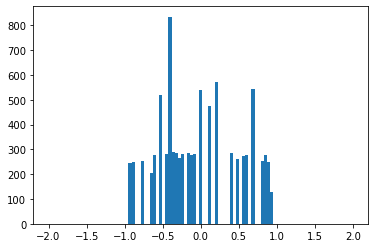

In [22]:
import matplotlib.pyplot as plt

plt.hist(X[:, 0], bins=np.linspace(-2, 2, 100))


In [75]:
def train_val_test_split(X, y, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1, random_seed=54):
    size = len(X)
    train_num = int(size*train_ratio)
    val_num = int(size*val_ratio)
    
    # randomly shuffling X and y in unison
    np.random.seed(random_seed)
    perm = np.random.permutation(len(X))
    X = X[perm]
    y = y[perm]
    
    X_train, X_val, X_test = X[:train_num], X[train_num:train_num+val_num], X[train_num+val_num:]
    y_train, y_val, y_test = y[:train_num], y[train_num:train_num+val_num], y[train_num+val_num:]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train_, X_val_, X_test_, y_train_, y_val_, y_test_ = train_val_test_split(X, y)

In [76]:
X_train_.shape

(6279, 6)

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=20)
rf_regressor.fit(X_train_, y_train_)

RandomForestRegressor(max_depth=20)

In [78]:
from sklearn.metrics import mean_squared_error

rf_predictions = rf_regressor.predict(X_val_)

mean_squared_error(rf_predictions, y_val_)

0.6803470272487254

In [79]:
list(zip(y_val_, rf_predictions.tolist()))

[(array([1.38137286e-02, 1.01005612e+00, 2.10330827e-05]),
  [0.0007352453028313258, 1.0974860636528174, 1.064856168948393e-05]),
 (array([-4.64356672e-01, -4.64391522e-01,  2.10330827e-05]),
  [-0.4527488569795223, -0.47266906781545354, 1.8783803141369507e-05]),
 (array([-3.16763152e-01,  8.77773451e-01,  7.33929602e-05]),
  [-0.4837120873592457, 1.266058476352488, 5.815857254859013e-05]),
 (array([5.21548806e-03, 4.40442464e-01, 2.10330827e-05]),
  [0.007699851409297675, 0.6542257645666228, 1.8290965493699824e-05]),
 (array([-7.27251873e-01,  7.27208353e-01, -5.14685612e-06]),
  [-1.1756828831798898, 1.181620787156958, -4.307152823045888e-06]),
 (array([-1.27959861e-01, -4.02377232e-01,  2.10330827e-05]),
  [-0.11566529633973353, -0.3589717402360928, 7.154703587006491e-06]),
 (array([-4.94518197e-01, -4.94647144e-01,  2.10330827e-05]),
  [-0.41740406845638395, -0.42195700784283907, 1.9985885112319476e-05]),
 (array([-1.01439715e-01, -3.24647842e-01,  2.10330827e-05]),
  [-0.074483896

In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class VelocityPredictor2D(nn.Module):
    
    def __init__(self, n_feature, n_hidden=64, n_output=1, n_layer=1):
        super(VelocityPredictor2D, self).__init__()
        self.input = nn.Linear(n_feature, n_hidden)
        self.fcs = []
        for i in range(n_layer):
            self.fcs.append(nn.Linear(n_hidden, n_hidden))
        self.fcs = nn.ModuleList(self.fcs)
        self.predict = nn.Linear(n_hidden, n_output)
    
    def forward(self, X):
        res = F.relu(self.input(X))
        for fc in self.fcs:
            res = F.relu(fc(res))
        res = self.predict(res)
        return res
    
nn_regressor = VelocityPredictor2D(n_feature=6, n_layer=5, n_output=3)
optimizer = torch.optim.Adam(nn_regressor.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
loss_func = torch.nn.MSELoss()
epochs = 1000

train_perm, val_perm = torch.randperm(len(X_train_)), torch.randperm(len(X_val_)) 

X_train = torch.tensor(X_train_,dtype=torch.float32)[train_perm]
y_train = torch.tensor(y_train_, dtype=torch.float32)[train_perm]
X_val = torch.tensor(X_val_, dtype=torch.float32)[val_perm]
y_val = torch.tensor(y_val_,dtype=torch.float32)[val_perm]

model_save_path = 'nn_4layer_3D_dynamics.pt'
losses = []

for epoch in range(epochs):
    
    best_val_loss = float('inf')
    
    prediction = nn_regressor(X_train)
    loss = loss_func(prediction, y_train)

    optimizer.zero_grad()
    loss.backward()         
    optimizer.step()
#     scheduler.step()
    print(f'epoch number: {epoch+1}, MSE Loss: {loss.data}')
    
    if epoch % 100 == 0:
        val_y_preds = nn_regressor(X_val)
        val_loss = loss_func(val_y_preds, y_val)
        print('Validation Loss: ', val_loss.data)
        losses.append(val_loss.data.item())
        if val_loss.data < best_val_loss:
            best_val_loss = val_loss.data
            torch.save(nn_regressor.state_dict(), model_save_path)

epoch number: 1, MSE Loss: 1.4542893171310425
Validation Loss:  tensor(1.1276)
epoch number: 2, MSE Loss: 1.4539213180541992
epoch number: 3, MSE Loss: 1.4535601139068604
epoch number: 4, MSE Loss: 1.4532051086425781
epoch number: 5, MSE Loss: 1.4528529644012451
epoch number: 6, MSE Loss: 1.4525038003921509
epoch number: 7, MSE Loss: 1.4521576166152954
epoch number: 8, MSE Loss: 1.4518144130706787
epoch number: 9, MSE Loss: 1.4514739513397217
epoch number: 10, MSE Loss: 1.451135277748108
epoch number: 11, MSE Loss: 1.4507966041564941
epoch number: 12, MSE Loss: 1.4504590034484863
epoch number: 13, MSE Loss: 1.4501219987869263
epoch number: 14, MSE Loss: 1.4497859477996826
epoch number: 15, MSE Loss: 1.4494503736495972
epoch number: 16, MSE Loss: 1.4491151571273804
epoch number: 17, MSE Loss: 1.4487788677215576
epoch number: 18, MSE Loss: 1.4484400749206543
epoch number: 19, MSE Loss: 1.4480990171432495
epoch number: 20, MSE Loss: 1.4477553367614746
epoch number: 21, MSE Loss: 1.4474111

epoch number: 174, MSE Loss: 0.7818779945373535
epoch number: 175, MSE Loss: 0.7751936316490173
epoch number: 176, MSE Loss: 0.7686126232147217
epoch number: 177, MSE Loss: 0.762109100818634
epoch number: 178, MSE Loss: 0.7556625008583069
epoch number: 179, MSE Loss: 0.7492871880531311
epoch number: 180, MSE Loss: 0.742982029914856
epoch number: 181, MSE Loss: 0.736734926700592
epoch number: 182, MSE Loss: 0.7305704951286316
epoch number: 183, MSE Loss: 0.7245084643363953
epoch number: 184, MSE Loss: 0.7185364365577698
epoch number: 185, MSE Loss: 0.7126632332801819
epoch number: 186, MSE Loss: 0.7069194912910461
epoch number: 187, MSE Loss: 0.7013000845909119
epoch number: 188, MSE Loss: 0.6958035230636597
epoch number: 189, MSE Loss: 0.6904430389404297
epoch number: 190, MSE Loss: 0.6852325797080994
epoch number: 191, MSE Loss: 0.6801918745040894
epoch number: 192, MSE Loss: 0.6753302216529846
epoch number: 193, MSE Loss: 0.6706264615058899
epoch number: 194, MSE Loss: 0.666082262992

epoch number: 344, MSE Loss: 0.5658135414123535
epoch number: 345, MSE Loss: 0.5657774806022644
epoch number: 346, MSE Loss: 0.5657406449317932
epoch number: 347, MSE Loss: 0.5657059550285339
epoch number: 348, MSE Loss: 0.5656704902648926
epoch number: 349, MSE Loss: 0.5656343102455139
epoch number: 350, MSE Loss: 0.5655999779701233
epoch number: 351, MSE Loss: 0.5655651688575745
epoch number: 352, MSE Loss: 0.5655315518379211
epoch number: 353, MSE Loss: 0.5654977560043335
epoch number: 354, MSE Loss: 0.5654656887054443
epoch number: 355, MSE Loss: 0.5654333829879761
epoch number: 356, MSE Loss: 0.5654007792472839
epoch number: 357, MSE Loss: 0.5653685331344604
epoch number: 358, MSE Loss: 0.5653365850448608
epoch number: 359, MSE Loss: 0.5653056502342224
epoch number: 360, MSE Loss: 0.565274715423584
epoch number: 361, MSE Loss: 0.5652433633804321
epoch number: 362, MSE Loss: 0.565212070941925
epoch number: 363, MSE Loss: 0.5651824474334717
epoch number: 364, MSE Loss: 0.56515198945

epoch number: 516, MSE Loss: 0.5619531273841858
epoch number: 517, MSE Loss: 0.5619363784790039
epoch number: 518, MSE Loss: 0.5619194507598877
epoch number: 519, MSE Loss: 0.5619024634361267
epoch number: 520, MSE Loss: 0.5618860721588135
epoch number: 521, MSE Loss: 0.5618689656257629
epoch number: 522, MSE Loss: 0.5618513822555542
epoch number: 523, MSE Loss: 0.5618351697921753
epoch number: 524, MSE Loss: 0.5618187189102173
epoch number: 525, MSE Loss: 0.5618017315864563
epoch number: 526, MSE Loss: 0.5617852210998535
epoch number: 527, MSE Loss: 0.5617688894271851
epoch number: 528, MSE Loss: 0.5617520213127136
epoch number: 529, MSE Loss: 0.5617356896400452
epoch number: 530, MSE Loss: 0.5617188811302185
epoch number: 531, MSE Loss: 0.5617021322250366
epoch number: 532, MSE Loss: 0.5616872310638428
epoch number: 533, MSE Loss: 0.5616700053215027
epoch number: 534, MSE Loss: 0.5616546273231506
epoch number: 535, MSE Loss: 0.5616386532783508
epoch number: 536, MSE Loss: 0.561622798

epoch number: 688, MSE Loss: 0.5590706467628479
epoch number: 689, MSE Loss: 0.5590553283691406
epoch number: 690, MSE Loss: 0.5590384602546692
epoch number: 691, MSE Loss: 0.5590206980705261
epoch number: 692, MSE Loss: 0.5590041279792786
epoch number: 693, MSE Loss: 0.5589878559112549
epoch number: 694, MSE Loss: 0.558971643447876
epoch number: 695, MSE Loss: 0.5589549541473389
epoch number: 696, MSE Loss: 0.5589379072189331
epoch number: 697, MSE Loss: 0.5589219331741333
epoch number: 698, MSE Loss: 0.5589044094085693
epoch number: 699, MSE Loss: 0.5588887333869934
epoch number: 700, MSE Loss: 0.5588722825050354
epoch number: 701, MSE Loss: 0.5588552951812744
Validation Loss:  tensor(0.4924)
epoch number: 702, MSE Loss: 0.5588387846946716
epoch number: 703, MSE Loss: 0.5588220953941345
epoch number: 704, MSE Loss: 0.5588045716285706
epoch number: 705, MSE Loss: 0.5587877035140991
epoch number: 706, MSE Loss: 0.5587713122367859
epoch number: 707, MSE Loss: 0.5587550401687622
epoch nu

epoch number: 858, MSE Loss: 0.5561555027961731
epoch number: 859, MSE Loss: 0.5561373233795166
epoch number: 860, MSE Loss: 0.5561161637306213
epoch number: 861, MSE Loss: 0.5561005473136902
epoch number: 862, MSE Loss: 0.5560796856880188
epoch number: 863, MSE Loss: 0.5560605525970459
epoch number: 864, MSE Loss: 0.5560423135757446
epoch number: 865, MSE Loss: 0.556023895740509
epoch number: 866, MSE Loss: 0.5560042262077332
epoch number: 867, MSE Loss: 0.5559878945350647
epoch number: 868, MSE Loss: 0.5559670925140381
epoch number: 869, MSE Loss: 0.5559484958648682
epoch number: 870, MSE Loss: 0.555931031703949
epoch number: 871, MSE Loss: 0.5559112429618835
epoch number: 872, MSE Loss: 0.555891215801239
epoch number: 873, MSE Loss: 0.5558701157569885
epoch number: 874, MSE Loss: 0.5558522343635559
epoch number: 875, MSE Loss: 0.5558343529701233
epoch number: 876, MSE Loss: 0.5558149814605713
epoch number: 877, MSE Loss: 0.5557924509048462
epoch number: 878, MSE Loss: 0.555774867534

In [9]:
sum(p.numel() for p in nn_regressor.parameters())

21443

([<matplotlib.axis.XTick at 0x7f0aa3b69b50>,
 <a list of 7 Text xticklabel objects>)

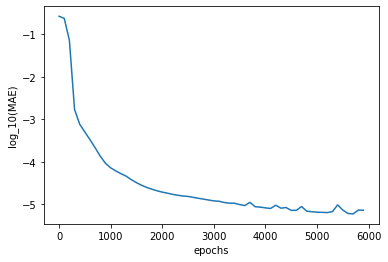

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(len(losses)), np.log10(losses))
plt.xlabel('epochs')
plt.ylabel('log_10(MAE)')
plt.xticks(ticks=np.arange(0,70,10), labels=np.arange(0,7000,1000))

In [16]:
# Load pytorch model

nn_regressor = PositionPredictor3D(n_feature=6, n_layer=5, n_output=3)
nn_regressor.load_state_dict(torch.load('./nn_4layer_3D_dynamics.pt'))
nn_regressor.eval()

PositionPredictor3D(
  (input): Linear(in_features=6, out_features=64, bias=True)
  (fcs): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (predict): Linear(in_features=64, out_features=3, bias=True)
)

In [17]:
# Validation

val_y_preds = nn_regressor(X_val)
val_loss = loss_func(val_y_preds, y_val)
print(val_loss.data)

tensor(0.2625)
